<img src="images/kiksmeisedwengougent.png" alt="Banner" width="1100"/>

<div>
    <font color=#690027 markdown="1">
        <h1>CONVOLUTIES</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
Met convoluties kan je op zoek gaan naar verschillende kenmerken in een afbeelding. Je kan er bv. randen mee detecteren, ruis in een beeld mee verminderen of het contrast in een beeld verzachten. Convoluties worden toegepast in de zogenaamde convolutionele netwerken.
</div>

<div class="alert alert-box alert-info">
De <b>convolutie</b> is een wiskundige bewerking die enkel gebruikmaakt van <b>optellen en vermenigvuldigen</b>. Het komt erop neer dat men aan een pixel een bepaald gewicht geeft en men daaraan gewogen waarden van de omliggende pixels aan toevoegt.<br>
Bij een convolutie laat men een <b>filter</b> over een <b>afbeelding</b> 'glijden'. Zowel de afbeelding als de filter zijn matrices of tensoren. De elementen van de filter en de elementen van de matrix van de afbeelding worden elementgewijs vermenigvuldigd en erna worden deze producten opgeteld.
</div>

<img src="images/sobelfilter.gif" alt="Banner" width="430"/>
<center>Figuur 1: Convolutie: de filter glijdt over de afbeelding [1].</center>

## Importeren van de nodige modules

De module SciPy bevat een toolbox signal voor digitale beeldverwerking, de toolbox bevat bv. functies waarmee je beelden kunt filteren. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from matplotlib.image import imread

<div>
    <font color=#690027 markdown="1">
        <h1>1. Foto's inladen</h1> 
    </font>
</div>

Bekijk enkele gegevens van de foto van het iGent-gebouw in Gent. Voer daarvoor de volgende code-cel uit.

In [3]:
igent = imread("images/igent.png", format="grayscale")
print(igent)
print(igent.shape)
print(np.min(igent), np.max(igent))

[[[110 110 110 255]
  [110 110 110 255]
  [110 110 110 255]
  ...
  [142 142 142 255]
  [142 142 142 255]
  [142 142 142 255]]

 [[110 110 110 255]
  [110 110 110 255]
  [110 110 110 255]
  ...
  [142 142 142 255]
  [142 142 142 255]
  [142 142 142 255]]

 [[111 111 111 255]
  [110 110 110 255]
  [110 110 110 255]
  ...
  [142 142 142 255]
  [142 142 142 255]
  [142 142 142 255]]

 ...

 [[ 98  98  98 255]
  [ 99  99  99 255]
  [100 100 100 255]
  ...
  [109 109 109 255]
  [111 111 111 255]
  [112 112 112 255]]

 [[ 99  99  99 255]
  [ 99  99  99 255]
  [100 100 100 255]
  ...
  [110 110 110 255]
  [110 110 110 255]
  [110 110 110 255]]

 [[ 99  99  99 255]
  [100 100 100 255]
  [100 100 100 255]
  ...
  [110 110 110 255]
  [110 110 110 255]
  [110 110 110 255]]]
(360, 460, 4)
3 255


Het ingeladen bestand is een tensor terwijl we een matrix verwachten. Als we kijken naar de inhoud van de tensor dan zien we dat deze drie keer dezelfde matrix bevat (controleer eventueel zelf door de matrices van elkaar af te trekken):

In [4]:
print(igent[:,:,0])
print(igent[:,:,1])
print(igent[:,:,2])

[[110 110 110 ... 142 142 142]
 [110 110 110 ... 142 142 142]
 [111 110 110 ... 142 142 142]
 ...
 [ 98  99 100 ... 109 111 112]
 [ 99  99 100 ... 110 110 110]
 [ 99 100 100 ... 110 110 110]]
[[110 110 110 ... 142 142 142]
 [110 110 110 ... 142 142 142]
 [111 110 110 ... 142 142 142]
 ...
 [ 98  99 100 ... 109 111 112]
 [ 99  99 100 ... 110 110 110]
 [ 99 100 100 ... 110 110 110]]
[[110 110 110 ... 142 142 142]
 [110 110 110 ... 142 142 142]
 [111 110 110 ... 142 142 142]
 ...
 [ 98  99 100 ... 109 111 112]
 [ 99  99 100 ... 110 110 110]
 [ 99 100 100 ... 110 110 110]]


We zetten de tensor om naar een matrix:

In [5]:
igent = igent[:,:,0]
igent.shape

(360, 460)

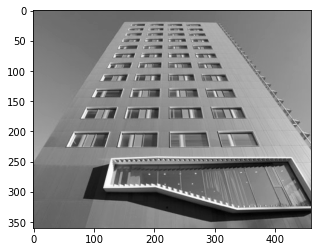

In [6]:
plt.imshow(igent, vmin=0, vmax=255, cmap="gray")

Toon de foto wat groter.

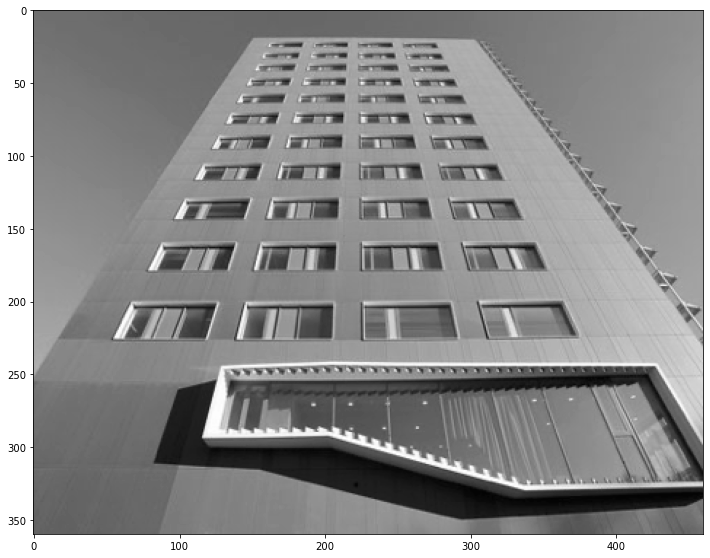

In [7]:
plt.figure(figsize=(12,16))       # verhouding respecteren
plt.imshow(igent, vmin=0, vmax=255, cmap="gray")

### Opdracht 1.1: fietsenstalling KASK
Doe nu hetzelfde voor de gang in de fietsenstalling van het KASK in Gent. Vul daarvoor onderstaande code aan:

In [8]:
fietsenstallingkask = imread("images/fietsenstallingkask.png", format="grayscale")

In wat volgt, ga je verschillende filters leren kennen en bekijken wat hun impact is op de foto's.<br>
Je zal filters gebruiken met dimensie 3x3.

<div>
    <font color=#690027 markdown="1">
        <h1>2. Randen detecteren</h1> 
    </font>
</div>

<div class="alert alert-box alert-info">
Randdetectie zoekt in de afbeelding naar pixels waar de kleur drastisch verandert.
</div>


Om *randen* te detecteren kun je bijvoorbeeld de filter $\begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1   \end{bmatrix} $ gebruiken.

Om Python de convolutie te laten uitvoeren van deze gekozen filter op een gegeven afbeelding, gebruik je de functie *convolve2d()*.<br>
De '2d' verwijst naar de matrices die je gebruikt, matrices zijn 2D-tensoren. Zowel de filter als de afbeelding hier zijn matrices.

### Voorbeeld: witte huis
Probeer deze filter uit op de foto van het 'witte huis' van Sint-Bavo. Voer daarvoor de volgende code-cellen uit.

In [14]:
# filter om randen te detecteren
rand_filter = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])      

In [15]:
print(rand_filter)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


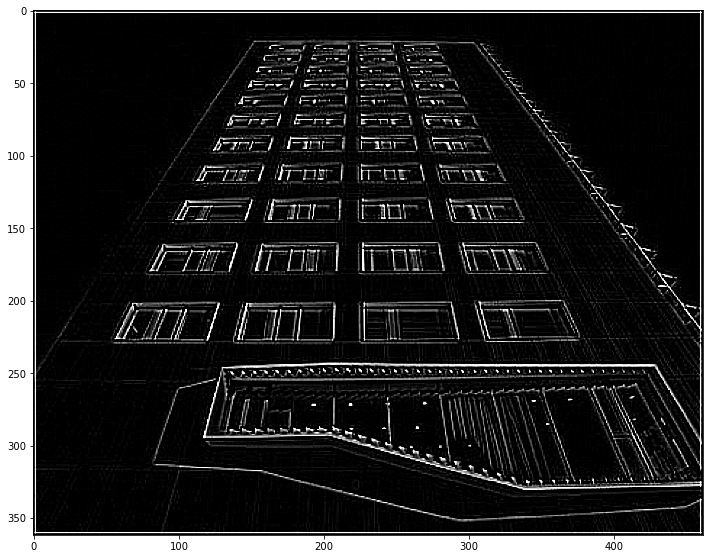

In [16]:
igent_randen = scipy.signal.convolve2d(igent, rand_filter)  # convolutie uitvoeren met rand_filter op foto wittehuis

# resultaat van convolutie tonen 
plt.figure(figsize=(12,16))
plt.imshow(igent_randen, vmin=0, vmax=255, cmap="gray")         

### Opdracht 2.1: fietsenstalling 
Probeer de filter uit op de foto van de fietsenstalling van het KASK

### Opdracht 2.2: huidmondjes
Doe hetzelfde voor de microfoto van de koffieplant. Laadt hiervoor eerst de foto .images/koffieplant.png in:

In [17]:
koffieplant = imread("images/koffieplant.png", format="grayscale")

<div>
    <font color=#690027 markdown="1">
        <h1>3. Verticale en horizontale lijnen detecteren</h1> 
    </font>
</div>

Om *verticale lijnen* te detecteren gebruik je bijvoorbeeld de filter $\begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1   \end{bmatrix} $. 

In [18]:
# filter om verticale lijnen te detecteren
vertic_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

### Voorbeeld: bamboe

Bekijk de foto van de bamboe.

(214, 320)


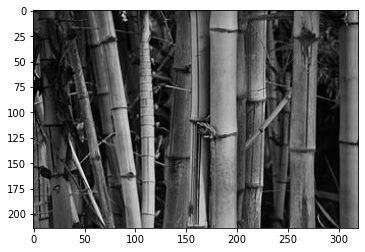

In [20]:
bamboe = imread("images/bamboe.png", format="grayscale")
print(bamboe.shape)
plt.imshow(bamboe, vmin=0, vmax=255, cmap="gray")

Op deze foto zijn heel wat verticale lijnen te zien. Test uit of de filter goed gekozen is door de volgende code-cel uit te voeren.

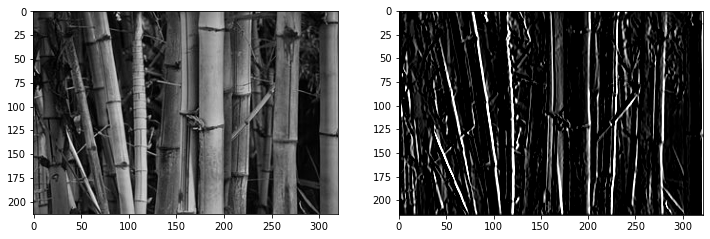

In [21]:
bamboe_vertic = scipy.signal.convolve2d(bamboe, vertic_filter)

plt.figure(figsize=(12,18))
plt.subplot(1,2,1)                                        # plot met meerdere afbeeldingen
plt.imshow(bamboe, vmin=0, vmax=255, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(bamboe_vertic, vmin=0, vmax=255, cmap="gray")

### Opdracht 3.1: iGent-toren
Detecteer nu de verticale lijnen op de foto van de iGent-toren.

### Opdracht 3.2: horizontale lijnen detecteren
-  Welke filter zal er *horizontale* lijnen detecteren? Geef de filter in in de volgende code-cel.
-  Test de filter uit op de iGent-toren.

<div>
    <font color=#690027 markdown="1">
        <h1>4. Schuine lijnen detecteren</h1> 
    </font>
</div>

Je krijgt twee voorbeelden van filters die schuine lijnen detecteren, elk in een andere richting (van linksboven naar rechtsonder, of van rechtsboven naar linksonder).<br>
De filters zijn $\begin{bmatrix} -5 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 5   \end{bmatrix}$ en $\begin{bmatrix} 0 & 0 & -5 \\ 0 & 0 & 0 \\ 5 & 0 & 0   \end{bmatrix}$.

In [22]:
# filter om schuine lijnen te detecteren
schuin_filter = np.array([[-5,0,0],[0,0,0],[0,0,5]]) 

In [23]:
# filter om schuine lijnen te detecteren
schuin_filter2 = np.array([[0,0,-5],[0,0,0],[5,0,0]]) 

### Opdracht 4.1: gang
Onderzoek op de foto van de fietsenstalling van het KASK in welke richting deze filters schuine lijnen detecteren. <br>
Vul eerst de code-cel aan en voer ze dan uit.

In [ ]:
fietsenstalling_schuin = ...........
fietsenstalling_schuin2 = ...........

plt.figure(figsize=(18,30))
plt.subplot(...........)
plt.imshow(..........., vmin=0, vmax=255, cmap="gray")
plt.subplot(...........)
plt.imshow(..........., vmin=0, vmax=255, cmap="gray")

### Opdracht 4.2: huidmondjes
Pas een van deze filters toe op de microfoto van de koffieplant. 

<div>
    <font color=#690027 markdown="1">
        <h1>5. Foto verzachten of verscherpen</h1> 
    </font>
</div>

Je kan met een filter een foto zachter maken of verscherpen. 

In [24]:
# filter om foto te verzachten
smooth_filter = np.array([[1, 1, 1], [1, 5, 1], [1, 1, 1]]) / 13

### Voorbeeld
Verzacht de foto van de bamboe door de volgende code-cel uit te voeren.

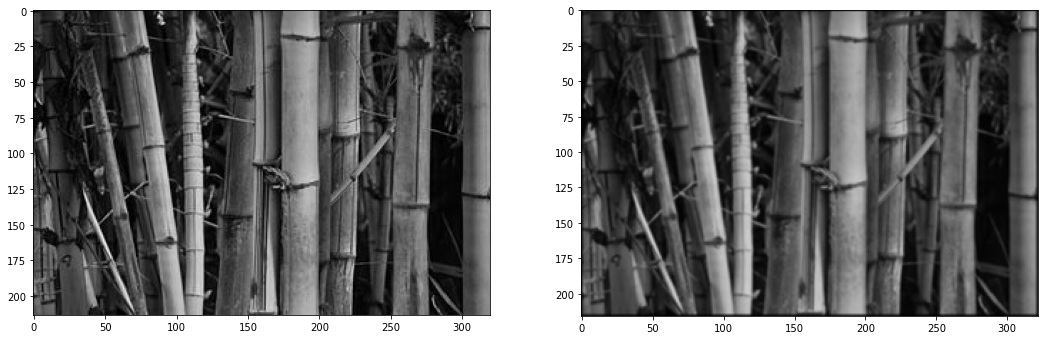

In [25]:
bamboe_zacht = scipy.signal.convolve2d(bamboe, smooth_filter)

plt.figure(figsize=(18,24))
plt.subplot(1,2,1)
plt.imshow(bamboe, vmin=0, vmax=255, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(bamboe_zacht, vmin=0, vmax=255, cmap="gray")

### Voorbeeld van twee convoluties die opeenvolgend worden toegepast
In het volgende voorbeeld wordt de randdetectie toegepast op de verzachte foto van de bamboe. Voer de code-cel uit.

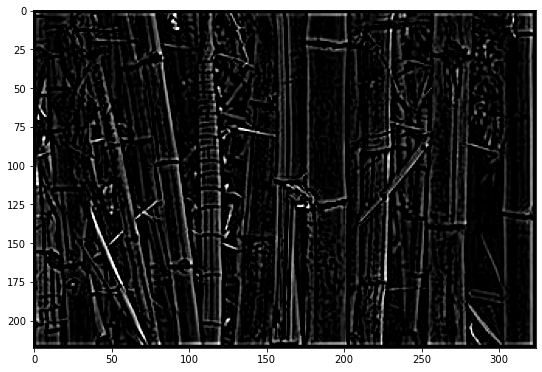

In [26]:
bamboe_zacht_randen = scipy.signal.convolve2d(bamboe_zacht, rand_filter)
plt.figure(figsize=(9,12))
plt.imshow(bamboe_zacht_randen, vmin=0, vmax=255, cmap="gray")

### Opdracht 5.1
Bekijk het verschil in resultaat als je de randdetectie uitvoert op de foto van de bamboe zelf, of pas na het verzachten.<br>
Zorg dat beide resultaten naast elkaar worden getoond.

### Opdracht 5.2: verscherpen
Om een foto te verscherpen, kan je de volgende filter gebruiken: $\begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0   \end{bmatrix}$.<br> Geef deze filter in in Python met de juiste instructie.

### Opdracht 5.3: bamboe
Verscherp de foto van de bamboe.

### Opdracht 5.4: huidmondjes
Verscherp de microfoto van de koffieplant.

<div>
    <font color=#690027 markdown="1">
        <h1>6. Enkele filters om uit te testen</h1> 
    </font>
</div>

In het verleden zijn er reeds heel wat kant-en-klare filters ontwikkeld door o.a. wiskundigen, informatici en computerwetenschappen. Het voordeel van deze kant-en-klare filters is dat ze direct inzetbaar zijn voor tal van toepassingen in de beeldverwerking. Hieronder vind je enkele van deze filters. Probeer ze zelf uit op de foto's van deze notebook!

In [27]:
filter1 = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])            # emboss
filter2 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9           # gemiddelde
filter3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16          # Gaussian blur
filter4 = np.array([[-1, -2, -1], [-2, 12, -2], [-1, -2, -1]])      # verschil tussen origineel en Gaussian blur
filter5 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])            # Sobel filter randdetectie
filter6 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])            # tweede Sobel filter randdetectie
filter7 = np.array([[-1, -2, -1], [-2, 12, -2], [-1, -2, -1]])      # randdetectie 
filter8 = np.array([[1, 1, 1], [-1, -2, 1], [-1, -1, 1]])           # schuine lijnen met hoek van 45°
filter9 = np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]])          # schuine lijnen
filter10 = np.array([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])            # randdetectie 

<div class="alert alert-box alert-success">
Convoluties worden toegepast in de convolutionele netwerken. Dit zijn diepe neurale netwerken die uitermate geschikt zijn voor beeldherkenning. In de verschillende layers van het neurale netwerk gaat men op zoek naar kenmerken die steeds complexer worden. In de eerste layer gaat men bv. op zoek naar randen, in een diepere layer naar een ovaal. Om die kenmerken te detecteren gebruikt men filters die men over het beeld laat glijden.
</div>

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Afbeelding van Rob Robinson, MLNotebook. Geraadpleegd op 19 mei 2019 via https://mlnotebook.github.io.<br>
[2] Foto Hotel van Eersel van Joostvandeputte [Public domain]. Geraadpleegd op 15 mei 2019 via https://commons.wikimedia.org.<br>
[3] Foto KA Etterbeek. Facebookpost van 24 januari 2019. Geraadpleegd op 19 mei 2019 via https://www.facebook.com/AtheneumEtterbeek.<br> 
[4] Foto van Sean McGrath from Saint John, NB, Canada [CC BY 2.0 (https://creativecommons.org/licenses/by/2.0)], via Wikimedia Commons.<br> &nbsp; &nbsp; &nbsp; &nbsp;  Geraadpleegd op 19 mei 2019 via https://nl.wikipedia.org/wiki/Bestand:Bamboo_(1466706101).jpg.

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">AI op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 

<div>
    <h2>Met steun van</h2> 
</div>

<img src="images/kikssteun.png" alt="Banner" style="width: 1100px;"/>